## Aluno: Fernando Gomes Papi

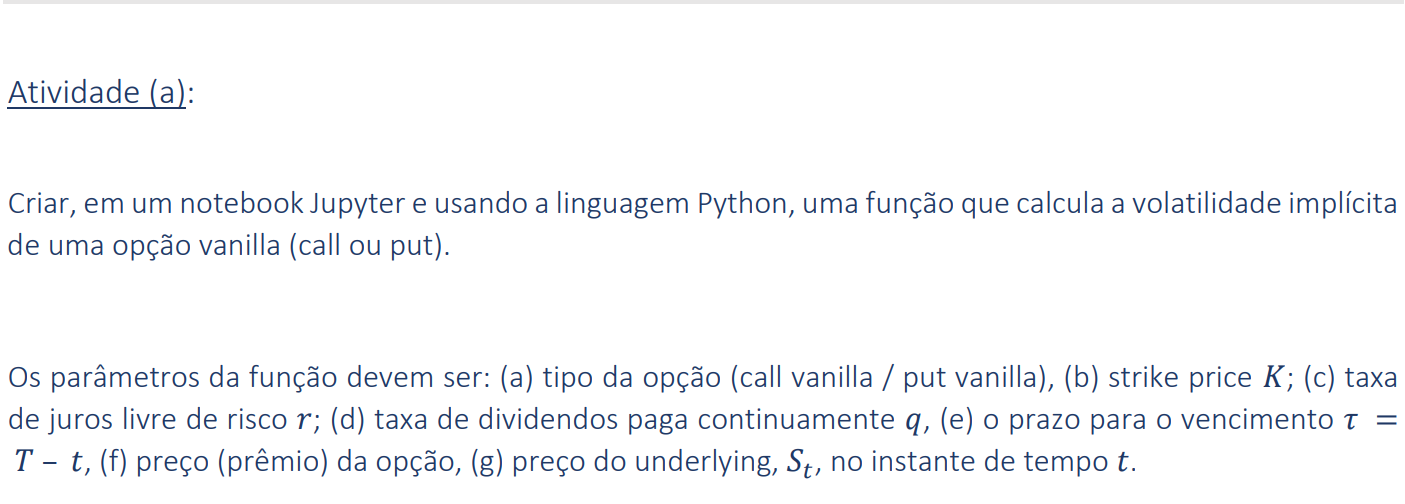

Cálculo da volatilidade implícita utilizando Newton-Raphson

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

In [56]:
def black_scholes_pricing_option(r, S, K, T, sigma, option_type, q):
    "Calcula o preço de opção Black-Scholes para call/put"
    # Cálculo dos valores d1 e d2
    d1 = (np.log(S/K) + (r-q + 0.5*sigma**2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    
    if option_type == "call":
        # Cálculo do preço da opção de compra
        price = np.exp(-r*T) * (S*np.exp((r-q)*T) * norm.cdf(d1, 0, 1) - K*norm.cdf(d2, 0, 1))
    
    elif option_type == "put":
        # Cálculo do preço da opção de venda
        price = K*np.exp(-r*T)*norm.cdf(-d2, 0, 1) - S*norm.cdf(-d1, 0, 1)

    return price

def vega_calc(S, K, r, sigma, T):
    # print(sigma)
    # Calcula a derivada do preço da opção em relação à volatilidade (Vega) usando a fórmula de Black-Scholes
    d1 = (np.log(S/K) + (r + 0.5*sigma**2)*T)/(sigma*np.sqrt(T))
    vega = S * norm.pdf(d1, 0, 1) * np.sqrt(T)
    return vega 

In [60]:
def implied_volatility(r, S, K, T, option_type, q, market_price):
    MAX_TRY = 300
    _sigma = 0.5
    if S == K:
        return 0
    
    for i in range(MAX_TRY):
        _bs_price = black_scholes_pricing_option(r, S, K, T, _sigma, 
                                                 option_type, q)
        diff = market_price - _bs_price
        vega = vega_calc(S, K, r, _sigma, T)
        # print('vega', vega)
        # print('diff', diff, vega)
        # print('diff', market_price, _bs_price, diff/vega)

        if abs(diff) < 1e-5:
            return _sigma
        
        _sigma += diff/vega
        
    return _sigma

In [61]:
iv = [implied_volatility(0.1, 22, S, 0.25, 'call', 0, 1.875) for S in range(10,11)]

/tmp/ipykernel_26471/4092149252.py:19: RuntimeWarning: divide by zero encountered in scalar divide
  _sigma += diff/vega
/tmp/ipykernel_26471/1797073344.py:4: RuntimeWarning: invalid value encountered in scalar divide
  d1 = (np.log(S/K) + (r-q + 0.5*sigma**2)*T) / (sigma*np.sqrt(T))
/tmp/ipykernel_26471/1797073344.py:20: RuntimeWarning: invalid value encountered in scalar divide
  d1 = (np.log(S/K) + (r + 0.5*sigma**2)*T)/(sigma*np.sqrt(T))


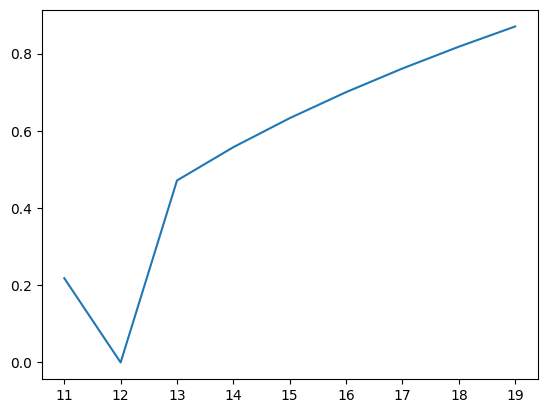

In [22]:
plt.plot(iv)

In [76]:
implied_volatility(0.1, 22, 2.1, 1, 'call', 0, 1.875)

/tmp/ipykernel_26471/4092149252.py:19: RuntimeWarning: divide by zero encountered in scalar divide
  _sigma += diff/vega
/tmp/ipykernel_26471/1797073344.py:4: RuntimeWarning: invalid value encountered in scalar divide
  d1 = (np.log(S/K) + (r-q + 0.5*sigma**2)*T) / (sigma*np.sqrt(T))
/tmp/ipykernel_26471/1797073344.py:20: RuntimeWarning: invalid value encountered in scalar divide
  d1 = (np.log(S/K) + (r + 0.5*sigma**2)*T)/(sigma*np.sqrt(T))


nan

In [ ]:
def merton_jump_diffusion_option(S, X, r, q, sigma, T, lambda_, beta_Y, sigma_Y, option_type = "call"):
    """Calculate the price of a European option using the Merton Jump Diffusion model.
    
    Parameters:
    S (float): Current price of the underlying asset
    X (float): Strike price of the option
    r (float): Risk-free interest rate
    q (float): Dividend yield
    sigma (float): Volatility of the underlying asset
    T (float): Time to maturity of the option
    lambda_ (float): Intensity of the Poisson process governing the jump arrivals
    beta_Y (float): Mean jump size
    sigma_Y (float): Standard deviation of the jump size
    option_type (str): Type of the option: "call" or "put"
    Returns:
    float: Price of the option
    """

    kappa = np.exp(beta_Y + 0.5 * sigma_Y**2) - 1
    lambda_R = lambda_ * (1 + kappa)
    
    Vt = 0
    lim = int(4 * (lambda_ * T))
    jump_term = 0
    
    for k in range(lim + 1):
        r_n = r - lambda_ * kappa + (k/T) * (beta_Y + 0.5 * sigma_Y**2 )
        sigma_n = np.sqrt(sigma**2 + (k/T) * sigma_Y**2)
        # Calculate the probability of k jumps
        poisson_prob = np.exp(-lambda_R * T) * (lambda_R * T)**k / factorial(k)
        BnS_price = black_scholes_price(option_type, X, r_n, q, T, sigma_n, S)
        Vt += poisson_prob * BnS_price
    
     return Vt
